In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler, Normalizer
from sklearn.feature_selection import RFE, SelectKBest,chi2

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./housing.csv',header=None, delimiter='\s+',names = column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.shape
#There are 506 rows & 14 features

(506, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isnull().sum()
#No Null Values Are Present In This Dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
#Numerical Features
numerical_features = [features for features in df.columns if df[features].dtypes!= 'O']

In [11]:
print(numerical_features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


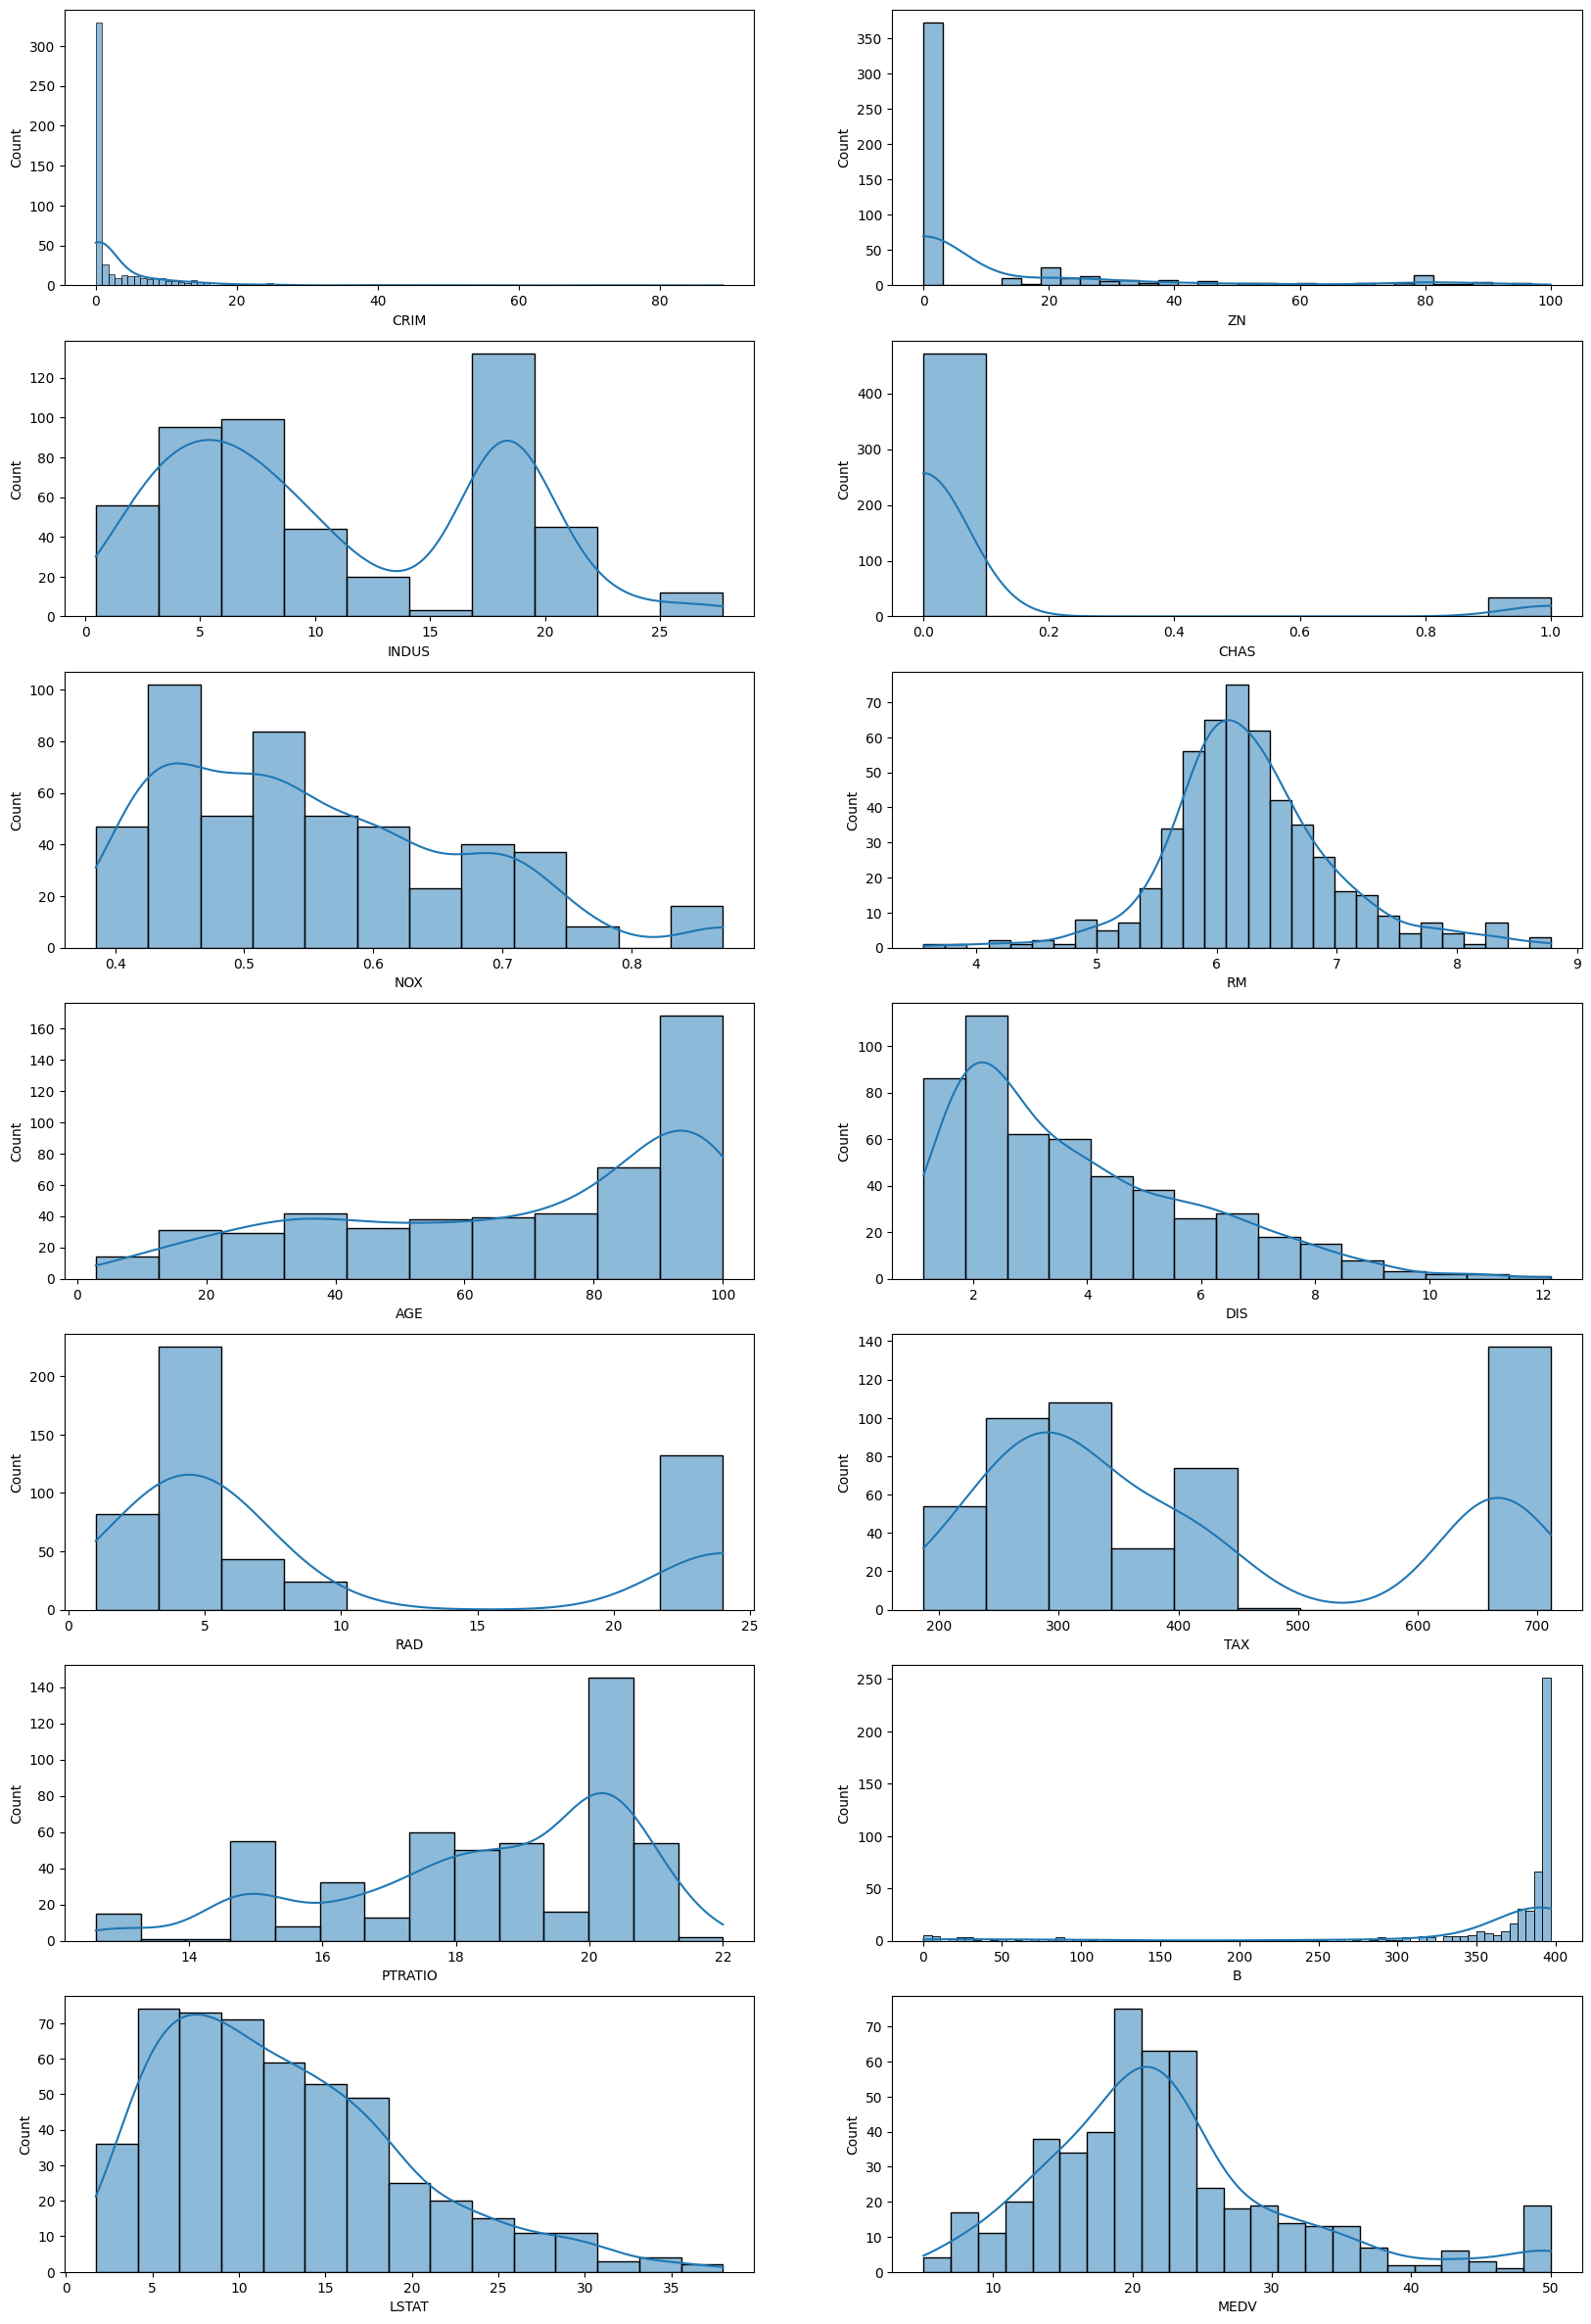

In [12]:
plt.figure(figsize=(20,30))
plt.subplot(7,2,1)
sns.histplot(df['CRIM'],kde=True)
plt.subplot(7,2,2)
sns.histplot(df['ZN'],kde=True)
plt.subplot(7,2,3)
sns.histplot(df['INDUS'],kde=True)
plt.subplot(7,2,4)
sns.histplot(df['CHAS'],kde=True)
plt.subplot(7,2,5)
sns.histplot(df['NOX'],kde=True)
plt.subplot(7,2,6)
sns.histplot(df['RM'],kde=True)
plt.subplot(7,2,7)
sns.histplot(df['AGE'],kde=True)
plt.subplot(7,2,8)
sns.histplot(df['DIS'],kde=True)
plt.subplot(7,2,9)
sns.histplot(df['RAD'],kde=True)
plt.subplot(7,2,10)
sns.histplot(df['TAX'],kde=True)
plt.subplot(7,2,11)
sns.histplot(df['PTRATIO'],kde=True)
plt.subplot(7,2,12)
sns.histplot(df['B'],kde=True)
plt.subplot(7,2,13)
sns.histplot(df['LSTAT'],kde=True)
plt.subplot(7,2,14)
sns.histplot(df['MEDV'],kde=True)
plt.show()

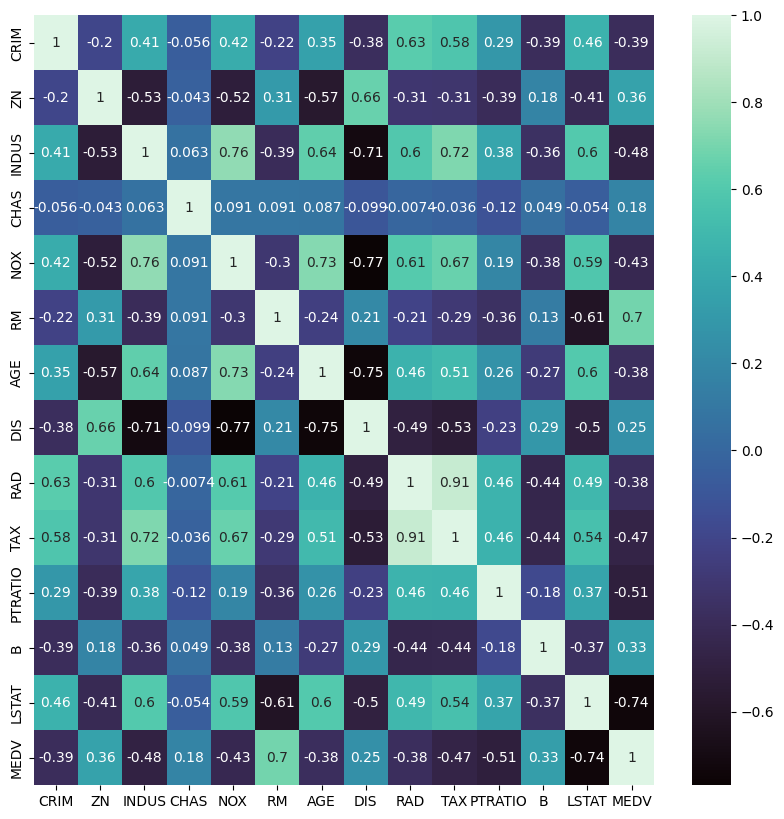

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='mako',annot=True)
plt.show()

In [14]:
categorical_features = [features for features in df.columns if features not in numerical_features ]

In [15]:
categorical_features
##There are no ccategorical_features

[]

In [16]:
## types in Numerical
## 1. Discrete
## 2. Continous

In [17]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

In [18]:
discrete_feature

['CHAS', 'RAD']

In [19]:
for i in discrete_feature:
    print(i, 'Possible values: ',df[i].unique())

CHAS Possible values:  [0 1]
RAD Possible values:  [ 1  2  3  5  4  8  6  7 24]


In [20]:
continous_features = [feature for feature in numerical_features if feature not in discrete_feature ]

In [21]:
print(continous_features)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [22]:
df[continous_features].describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## Here MEDV is house price and it is dependent variable

In [23]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [67]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)
print("Training Accuracy: ",model.score(X_train,y_train)*100)
print("Testing Accuracy: ",model.score(X_test,y_test)*100)
print('Root Mean Squared Error ',root_mean_squared_error(y_test,y_pred))
print('Mean Absolute Error ',mean_absolute_error(y_test,y_pred))

Training Accuracy:  74.80872598623442
Testing Accuracy:  68.44267283527108
Root Mean Squared Error  4.700924890603779
Mean Absolute Error  3.0609395954370573


In [69]:
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Intercept:  29.836420163838653


In [32]:
def plot_regression(X,y):
    fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
    index = 0
    axs = axs.flatten()
    colors = ["blue", "green", "red", "purple", "orange", "yellow", "brown", "pink", "grey", "teal", "cyan", "magenta", "lime"]
    for i, k in enumerate(X.columns):
        sns.regplot(y=y, x=X[k], ax=axs[i], color=colors[i])
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

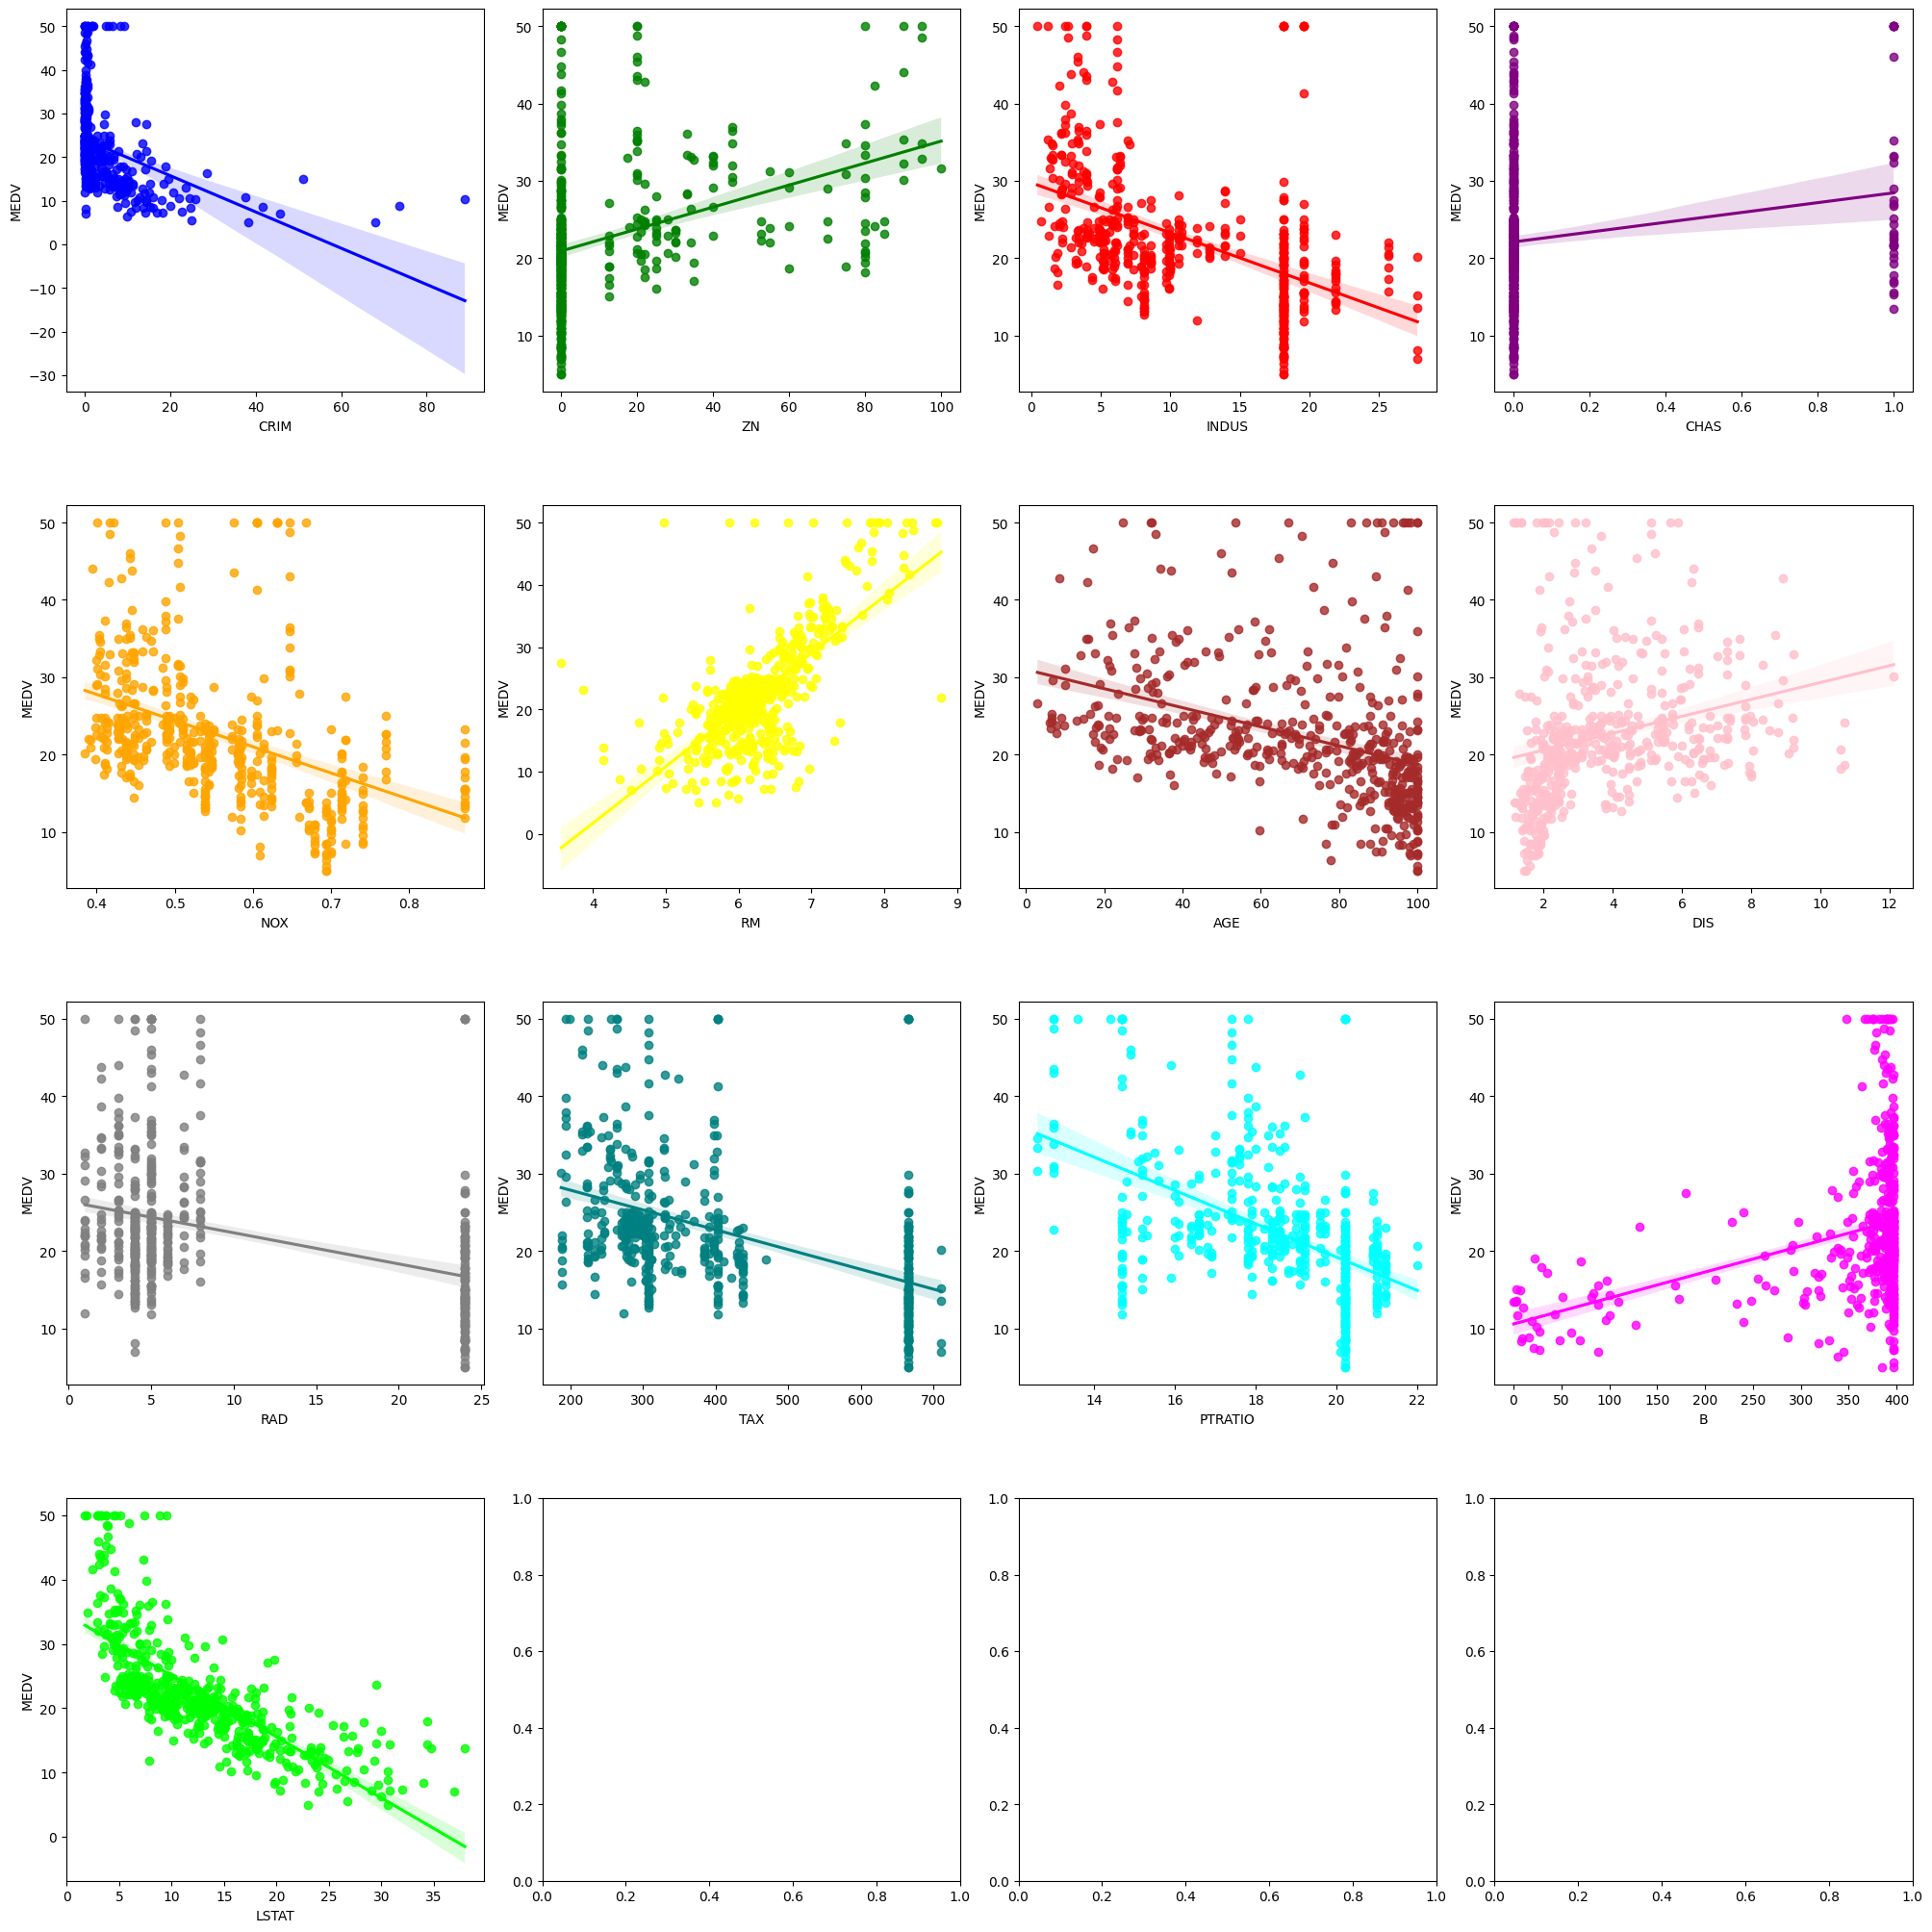

In [33]:
plot_regression(X,y)

In [59]:
df_pro = df
X = df_pro.drop('MEDV',axis=1)
y = df_pro['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [60]:
def evaluate_model(X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Training Accuracy: ",model.score(X_train,y_train)*100)
    print("Testing Accuracy: ",model.score(X_test,y_test)*100)
    print('Root Mean Squared Error ',root_mean_squared_error(y_test,y_pred))
    print('Mean Absolute Error ',mean_absolute_error(y_test,y_pred))
    print('Coefficients: ',model.coef_)
    print('Intercept: ',model.intercept_)

In [61]:
scaler1 = StandardScaler()
X_train_ss = scaler1.fit_transform(X_train)
X_test_ss = scaler1.transform(X_test)

In [62]:
evaluate_model(X_train_ss,y_train,X_test_ss,y_test)

Training Accuracy:  74.8087259862344
Testing Accuracy:  68.44267283527132
Root Mean Squared Error  4.700924890603761
Mean Absolute Error  3.0609395954370324
Coefficients:  [-1.06546379  0.68154987  0.33928836  0.73726309 -1.93178062  3.14172655
 -0.25586276 -2.95561026  2.21416067 -1.65127265 -2.08714915  1.15235744
 -3.69504236]
Intercept:  22.90791556728232


In [63]:
scaler2 = MinMaxScaler()
X_train_mm = scaler2.fit_transform(X_train)
X_test_mm = scaler2.transform(X_test)

In [64]:
evaluate_model(X_train_mm,y_train,X_test_mm,y_test)

Training Accuracy:  74.80872598623442
Testing Accuracy:  68.4426728352713
Root Mean Squared Error  4.700924890603762
Mean Absolute Error  3.0609395954370324
Coefficients:  [-11.41649808   2.95517751   1.29623175   2.77350326  -7.89207097
  21.48116718  -0.89798872 -15.40519074   5.92850858  -5.21744086
  -8.67735568   5.22907382 -18.75925615]
Intercept:  24.78285485913328


In [65]:
scaler3 = Normalizer()
X_train_n = scaler3.fit_transform(X_train)
X_test_n = scaler3.transform(X_test)

In [66]:
evaluate_model(X_train_n,y_train,X_test_n,y_test)

Training Accuracy:  75.19288353492098
Testing Accuracy:  69.29346323484981
Root Mean Squared Error  4.637123096467061
Mean Absolute Error  2.9946127808410026
Coefficients:  [-1.05636982e+02  9.58593855e+00  4.99833469e+01  1.29597128e+03
 -6.75507786e+03  2.89731118e+03 -5.33422002e+00 -5.54508426e+02
  1.37986741e+02  6.82289033e+00 -4.14922982e+02  1.37384514e+01
 -2.44561822e+02]
Intercept:  3.023399213101854


In [44]:
df_pro = df
X = df_pro.drop('MEDV',axis=1)
y = df_pro['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [45]:
y = np.round(df['MEDV'])
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [63]:
featureScores.nlargest(5,'Score')['Specs']

9      TAX
1       ZN
0     CRIM
11       B
6      AGE
Name: Specs, dtype: object

In [64]:
def feature_selection(n_features,df):
    X = df[featureScores.nlargest(n_features,'Score')['Specs']]
    y = df['MEDV']
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
    evaluate_model(X_train,y_train,X_test,y_test)

In [65]:
feature_selection(14,df)

Training Accuracy:  74.34997532004697
Testing Accuracy:  71.12260057484929
Root Mean Squared Error  4.638689926172822
Mean Absolute Error  3.162709871457405


In [66]:
feature_selection(10,df)

Training Accuracy:  65.25596445766759
Testing Accuracy:  62.17633902588706
Root Mean Squared Error  5.3088210224970664
Mean Absolute Error  3.993412609110198


In [67]:
feature_selection(8,df)

Training Accuracy:  59.6429718447333
Testing Accuracy:  55.55386634138691
Root Mean Squared Error  5.754840575486369
Mean Absolute Error  4.339309175023386


In [68]:
feature_selection(5,df)

Training Accuracy:  28.271379996058464
Testing Accuracy:  32.60088654114478
Root Mean Squared Error  7.0866893415396675
Mean Absolute Error  5.25311020942348


In [69]:
feature_selection(1,df)

Training Accuracy:  20.458253108072988
Testing Accuracy:  23.247839962767557
Root Mean Squared Error  7.56243415567668
Mean Absolute Error  5.6890769381982365


In [46]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']
cv_scores = cross_val_score(model, X, y, cv=5)
print(cv_scores)
print("Mean: ",np.mean(cv_scores))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Mean:  0.3532759243958813


In [49]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 15))}]

model = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model)             

model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)      
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)

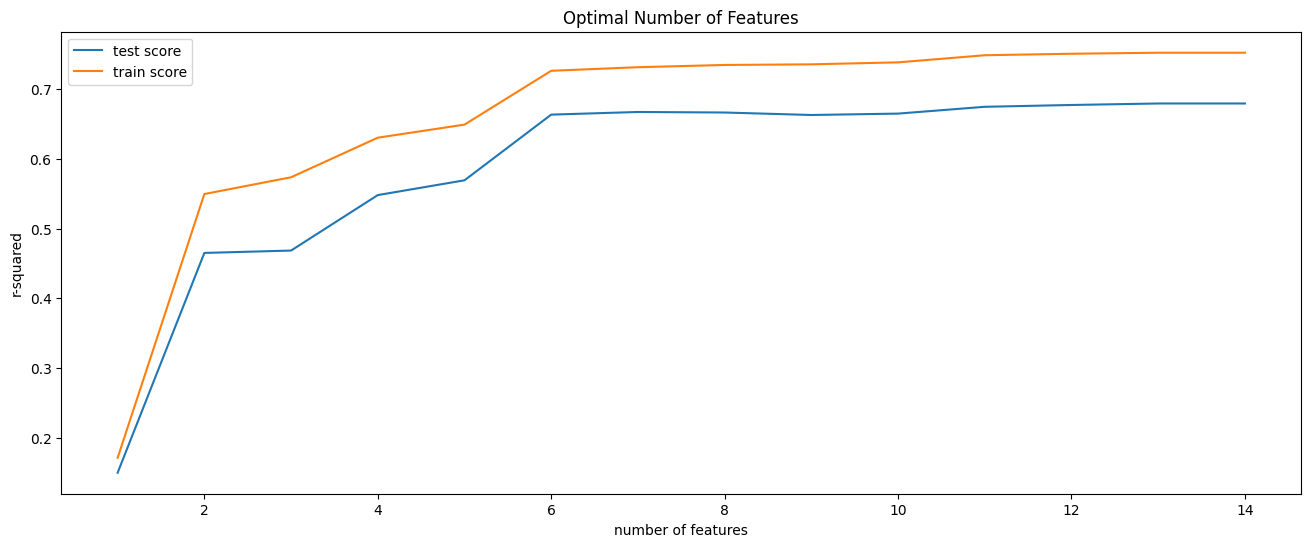

In [55]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [58]:
n_features_optimal = 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6844267283527108


In [70]:
print('Coefficients: ',lm.coef_)
print('Intercept: ',lm.intercept_)

Coefficients:  [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Intercept:  29.836420163838653
